# Cleaining the Photometry and save the SEDs data

In [12]:
import numpy as np
import time
import astropy.units as u
from astropy.table import Table, vstack, unique
from pathlib import Path
from matplotlib import pyplot as plt

import CleanPhotometry as CP #Code to clean the Photometry and ignore empty values in the tables

In [9]:
path_raw='../Datos/Raw/'
path_phot_ned = '../Datos/Work/Phot_Tables_NED/' #In this path wi will save the photometry tables for each object
path_phot_cds = '../Datos/Work/Phot_Tables_CDS/'
path_SED = '../Datos/Work/SEDs/'
Path(path_SED).mkdir(parents=True, exist_ok=True)

### Eliminating photometric duplicates between NED and CDS Tables:

The next function checks the rows of the CDS and NED photometric tables and remove the duplicate data in the photometric bands:

In [3]:
def check_both_tables(ned,cds):
    to_rem = [] #Rows to be deleted or removed
    for u_refcode in np.unique(ned['Refcode']): #For each bibcode
        l_cds = np.where(cds['Bibcode'] == u_refcode)[0]# Save the index in CDS table where is the bibcode selected
        l_ned = np.where(ned['Refcode'] == u_refcode)[0]# Save the index in NED table where is the bibcode selected
        if len(l_cds) > 0 and len(l_ned) > 0:
            print('Duplicate!')
            for lcds in l_cds: #For each index found
                for lned in l_ned:
                    flx_ned = str(ned[lned]['Flux_Density'])#Get the flux values in each tables
                    flx_cds = str(cds[lcds]['sed_flux'])
                    if flx_ned == flx_cds: #If the fluxes values are equel then...
                        print('Deleting NED filter ',ned[lned]['Observed_Passband'],
                              ' with Bibcode ',ned[lned]['Refcode'])                         
                        to_rem.append(lned) #Save the index to be removed in NED table because is duplicated in CDS
    print(to_rem)
    ned.remove_rows(to_rem)
    
    return ned

In [5]:
date_sample = 'Apr_12_2022'
NeIR_obj_t = Table.read(path_raw+'Obj_Ne-IR_'+date_sample+'.vot',format='votable')

### Cleaining the Photometry, ignore empty values and saving the SEDs data

In [6]:
start_cds = time.time()
for i, id_ in enumerate(NeIR_obj_t['Main_Id']):
    print(i,' ',id_,':')
    cds_table = Table.read(path_phot_cds+NeIR_obj_t['Main_Id'][i]+'_CDS_phot_tables'+'.vot',
                           format='votable')
    NED_table = Table.read(path_phot_ned+NeIR_obj_t['Main_Id'][i]+'_NED_phot_tables'+'.vot',
                           format='votable')          
    ned_table = check_both_tables(NED_table,cds_table)
    cleaned = CP.CleanPhotometry(cds_table, ned_table)
    SED = cleaned.final_tab
    BIBCODES = ';'.join(cleaned.bib_codes)
    with open("../Datos/Work/Bibcodes_SED.csv", "a+") as file_bibcodes:
        file_bibcodes.writelines([id_+',', BIBCODES+'\n'])
        file_bibcodes.close()
    SED.write(path_SED+id_+'_Phot.txt', format='ascii',overwrite=True)
    print(id_, 'Finish\n')
end_cds = time.time()

print('\nExecution Time(seg): ' + str(end_cds - start_cds))
print('Execution Time(min): ' + str((end_cds - start_cds)/60))
print('Execution Time(hrs): ' + str((end_cds - start_cds)/3600))

0   3C 234.0 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
[177, 163, 155, 136, 124, 173, 134, 217]
Cleaning
3C 234.0 Finish

1   M  84 :
Duplicate!
Deleting NED filter  750 MHz (NRAO)  with Bibcode  1966ApJS...13...65P
Deleting NED filter  1400 MHz (NRAO)  with Bibcode  1966ApJS...13...65P
Duplicate!
Deleting NED filter  5000 MHz  with Bibcode  1972AJ.....77..797P
Duplicate!
Duplicate!
Dup

Mrk  279 Finish

9   UGC 11680 :
[]
Cleaning
UGC 11680 Finish

10   LEDA   45656 :
Duplicate!
Deleting NED filter  V (Johnson)  with Bibcode  2009AJ....138..845O
Deleting NED filter  B (Johnson)  with Bibcode  2009AJ....138..845O
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Duplicate!
[42, 30, 118, 114, 107, 106]
Cleaning
LEDA   45656 Finish

11   Mrk 1239 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibc

2MASS J22255427+1958370 Finish

28   LEDA   90196 :
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  1.4 GHz (NVSS/FIRST)  with Bibcode  2018AJ....155..188L
[75, 46, 89]
Cleaning
LEDA   90196 Finish

29   MCG+04-48-002 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[112, 134, 132, 130]
Cleaning
MCG+04-48-002 Finish

30   [VV2000] J235225.0+244009 :
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Dele

IRAS 15480-0344 Finish

47   UGC  6728 :
Duplicate!
Duplicate!
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
[67]
Cleaning
UGC  6728 Finish

48   NGC  1142 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  31 GHz (OVRO)  with Bibcode  2009ApJ...704.1433M
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  12 microns WISE AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  H (2MASS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  5.8 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  4.5 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  Ks (2MASS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  H (2MASS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  5.8 microns IRAC AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  i (SDSS) AB  with Bibcode  2014ApJS..212...18B
Delet

NGC  3998 Finish

61   QSO B1626+5529 :
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  6 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
[94, 83, 91, 83, 81, 65]
Cleaning
QSO B1626+5529 Finish

62   Mrk    9 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED f

LEDA   29208 Finish

73   NGC    34 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
[103, 184, 171, 160, 138, 114, 175, 129]
Cleaning
NGC    34 Finish

74   SWIFT J0624.1-6059 :
[]
Cleaning
SWIFT J0624.1-6059 Finish

75   NGC  2685 :
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2011ApJ...731L..41B
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  140 mcicron

NGC  2639 Finish

86   NGC   513 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[101, 89, 80, 63, 50, 108, 106, 111, 110, 109]
Cleaning
NGC   513 Finish

87   NAME IRAS F15163+4255 NW :
Duplicate!
[]
Cleaning
NAME IRAS F15163+4255 NW Finish

88   ESO 383-35 :
Duplica

ESO 113-45 Finish

109   NGC  4388 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  22 microns (WISE)  with Bibcode  2014A&A...565A.128C
Deleting NED filter  12 microns (WISE)  with Bibcode  2014A&A...565A.128C
Deleting NED filter  8.0 microns (IRAC)  with Bibcode  2014A&A...565A.128C
Duplicate!
Deleting NED filter  22 microns (WISE)  with Bibcode  2014A&A...570A..69B
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS

IC 5298 Finish

120   IC 5063 :
Duplicate!
Deleting NED filter  843 MHz  with Bibcode  1992ApJS...80..137J
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  70 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Duplicate!
Duplicate!
Deleting NED filter  5 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  8 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Deleting NED filter  20 GHz (ATCA)  with Bibcode  2010MNRAS.402.2403M
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode

NGC  4138 Finish

127   NGC  1566 :
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2007ApJ...669..959R
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  843 MHz (SUMSS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
[258, 310, 309, 173]
Cleaning
NGC  1566 Finish

128   NGC  1808 :
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  843 MHz (SUMSS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (NVSS)  with Bibcode  2014MNRAS.440..696A
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
[110, 85, 162

NGC  5273 Finish

143   Mrk  609 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  1.4 GHz (NVSS/FIRST)  with Bibcode  2018AJ....155..188L
[134, 124, 115, 97, 86, 128, 93, 146]
Cleaning
Mrk  609 Finish

144   NGC  3079 :
Duplicate!
Deleting NED filter  151 MHz (6C)  with Bibcode  1990MNRAS.246..256H
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D

ICRF J145907.5+714019 Finish

154   NGC   424 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[163, 149, 140, 124, 110, 171, 168, 175, 174, 173]
Cleaning
NGC   424 Finish

155   Mrk  509 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Duplicate!
De

2XMM J101756.8+390526 Finish

166   2XMM J142930.6+425148 :
[]
Cleaning
2XMM J142930.6+425148 Finish

167   NGC  7314 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2018ApJS..234...18B
[240, 219, 205, 147, 149, 64, 61]
Cleaning
NGC  7314 Finish

168   ESO 420-13 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter

Mrk 1457 Finish

182   Mrk  573 :
Duplicate!
Duplicate!
Deleting NED filter  Qa (GeminiS)  with Bibcode  2014MNRAS.439.1648A
[184]
Cleaning
Mrk  573 Finish

183   ESO 428-14 :
Duplicate!
Deleting NED filter  70 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Duplicate!
Duplicate!
Deleting NED filter  PAH1 (VLT)  with Bibcode  2014MNRAS.439.1648A
Deleting NED filter  ARIII (VLT)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
[120, 114, 96, 98, 37, 36]
Cleaning
ESO 428-14 Finish

184   UGC  1841 :
Duplicate!
Deleting NED filter  8.4 GHz (VLA)  with Bibcode  2007ApJS..171...61H
Duplicate!
Deleting NED filter  86 GHz (IRAM)  with Bibcode  2014A&A...566A..59A
Deleting NED filter  86 GHz (IRAM)  with Bibcode  2014A&A...566A..59A
Duplicate!
[94, 69, 69]
Cleaning
UGC  1841 Finish


NGC  6300 Finish

198   NGC  5643 :
Duplicate!
Duplicate!
Duplicate!
[]
Cleaning
NGC  5643 Finish

199   NGC  2273 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  4 MHz (VLSSr)  with Bibcode  2015AJ....149...32M
Deleting NED filter  325 MHz (WENSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  1400 MHz (NVSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  850 MHz (GB6)  with Bibcode  2015AJ....149...32M
[95, 83, 77, 63, 58, 91, 62, 134, 133, 132, 1

Deleting NED filter  i (SDSS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  g (SDSS) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2014ApJS..212...18B
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2014ApJS..212...18B
Duplicate!
Deleting NED filter  z (SDSS) AB  with Bibcode  2014ApJS..215...22K
Duplicate!
Deleting NED filter  Q2 (VLT)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Duplicate!
Deleting NED filter  20 cm (Effelsberg)  with Bibcode  2017ApJ...836..185T
Deleting NED filter  6 cm (Effelsberg)  with Bibcode  2017ApJ...836..185T
Deleting NED filter  3.6 cm (Effelsberg)  with Bibcode  2017ApJ...836..185T
Duplicate!
Deleting NED filter  1.4 GHz (NVSS)  with Bibcode  2017ApJ...847..136B
[409, 392, 391, 316, 294, 263, 219, 282, 249, 305, 312, 277, 244, 222, 132, 102, 71, 51, 141, 301, 429, 405, 393, 426]
Cleaning
M  58 Finish

213   2dFGRS TGN336Z243 :
[]
Cleaning
2dFGRS TGN336Z243 Finish

214   LEDA 1487448 :
Duplicate!


LEDA   90127 Finish

226   ESO 445-50 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  Qa (GeminiS)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350

ESO 362-18 Finish

237   IC  450 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[203, 194, 184, 166, 151, 215, 210, 217, 216]
Cleaning
IC  450 Finish

238   NGC  6951 :
Duplicate!
Duplicate!
Deleting NED filter  3.6 microns IRAC AB  with Bibcode  2014MNRAS.444..527S
Duplicate!
[54]
Cleaning
NGC  6951 Finish



MCG-03-34-064 Finish

248   NGC  3516 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2011ApJ...731L..41B
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[234, 223, 212, 190, 171, 224, 276, 259, 244, 26

Ton  1565 Finish

264   Mrk  704 :
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
[153, 144, 138, 117, 106, 159, 157, 160]
Cleaning
Mrk  704 Finish

265   NGC  6240 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Du

M 106 Finish

276   NGC  5995 :
Duplicate!
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Deleting NED filter  K (ESO/SPM)  with Bibcode  1995ApJ...453..616S
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  250 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S

NGC  4051 Finish

290   LEDA   70560 :
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.9 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
[70, 60, 58, 48, 42, 67, 47]
Cleaning
LEDA   70560 Finish

291   3C 452 :
Duplicate!
Duplicate!
Deleting NED filter  408 MHz  with Bibcode  2014AJ....148...16S
Duplicate!
Duplicate!
[154]
Cleaning
3C 452 Finish

292   LEDA  165630 :
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V

MCG-01-24-012 Finish

305   NGC  1358 :
[]
Cleaning
NGC  1358 Finish

306   NGC  2110 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Duplicate!
Deleting NED filter  70 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Deleting NED filter  24 microns (MIPS)  with Bibcode  2009ApJ...707..890T
Duplicate!
Deleting NED filter  1.4 GHz (VLA)  with Bibcode  2011ApJ...731L..41B
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Duplicate!
Deleting NED filter  1.4 GHz (CHIPASS)  with Bibcode  2014MNRAS.440..696A
Deleting NED filter  1.4 GHz (NVSS)  with Bibcode  2014MNRAS.440..696A
Duplicate!
Deleting NED filter  NUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
Deleting NED filter  FUV (GALEX) AB  with Bibcode  2016ApJ...818..182V
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS

ESO 103-35 Finish

318   ICRF J182931.7+484446 :
Duplicate!
Deleting NED filter  151 MHz (6C)  with Bibcode  1993MNRAS.262.1057H
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  2.3 GHz (VLBA)  with Bibcode  2006AJ....131.1872P
Deleting NED filter  8.6 GHz (VLBA)  with Bibcode  2006AJ....131.1872P
Duplicate!
Deleting NED filter  86 GHz (VLBI)  with Bibcode  2008AJ....136..159L
Duplicate!
Duplicate!
Deleting NED filter  16.1 GHz (AMI)  with Bibcode  2009MNRAS.400..984D
Deleting NED filter  33 GHz (VSA)  with Bibcode  2009MNRAS.400..984D
Duplicate!
Deleting NED filter  151 MHz (VLBI)  with Bibcode  2010A&A...520A..62A
Duplicate!
Deleting NED filter  86 GHz (IRAM)  with Bibcode  2010ApJS..189....1A
Duplicate!
Deleting NED filter  14.5 GHz (UMRAO)  with Bibcode  2011ApJ...742...27L
Deleting NED filter  15 GHz (VLBA)  with Bibcode  2011ApJ...742...27L
Duplicate!
Deleting NED filter  86 GHz (IRAM)  with Bibcode  2014A&A...566A

Mrk  463 Finish

332   ICRF J130533.0-103319 :
Duplicate!
Deleting NED filter  365 MHz (Texas)  with Bibcode  1996AJ....111.1945D
Duplicate!
Deleting NED filter  18.5 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Deleting NED filter  22 GHz (ATCA)  with Bibcode  2006A&A...445..465R
Duplicate!
Deleting NED filter  8.4 GHz (VLA)  with Bibcode  2007ApJS..171...61H
Duplicate!
Duplicate!
Deleting NED filter  V (Johnson)  with Bibcode  2009AJ....138..845O
Deleting NED filter  B (Johnson)  with Bibcode  2009AJ....138..845O
Duplicate!
Deleting NED filter  8 microns (Spitzer)  with Bibcode  2009ApJ...698.1682W
Duplicate!
Deleting NED filter  30 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  20 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  15 microns (Spitzer)  with Bibcode  2009ApJS..182..628V
Deleting NED filter  6 microns (Spitzer)  with Bibcode  2009ApJS..182..6

LBQS 1244+0238 Finish

342   NGC  6860 :
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  25 microns (Spitzer)  with Bibcode  2011ApJ...730...19S
Deleting NED filter  7.7 microns Spitzer  with Bibcode  2011ApJ...730...19S
Duplicate!
Deleting NED filter  160 microns (PACS)  with Bibcode  2014ApJ...794..152M
Deleting NED filter  70 microns (PACS)  with Bibcode  2014ApJ...794..152M
Duplicate!
Deleting NED filter  NEII_1 (VLT)  with Bibcode  2014MNRAS.439.1648A
Duplicate!
Deleting NED filter  500 microns (SPIRE)  with Bibcode  2016MNRAS.456.3335S
Deleting NED filter  350 microns (

NGC  3783 Finish

354   NGC  3982 :
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  30 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  20 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  14.7 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  10 microns (IRS)  with Bibcode  2009ApJ...705...14D
Deleting NED filter  5.5 microns (IRS)  with Bibcode  2009ApJ...705...14D
Duplicate!
Duplicate!
Duplicate!
Duplicate!
Deleting NED filter  22 microns (WISE)  with Bibcode  2014A&A...565A.128C
Deleting NED filter  12 microns (WISE)  with Bibcode  2014A&A...565A.128C
Duplicate!
Duplicate!
Deleting NED filter  4 MHz (VLSSr)  with Bibcode  2015AJ....149...32M
Deleting NED filter  325 MHz (WENSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  1400 MHz (NVSS)  with Bibcode  2015AJ....149...32M
Deleting NED filter  850 MHz (GB6)  with Bibcode  2015AJ....149...32M
Duplicate!
Deleting NED filter  150 MHz (LOFAR)  with Bibcode  20

### Plotting the SEDs from NED and CDS

The next funcion plots the SED directly from the data obteined in the photmetry tables downloades from NED and CDS and previosly saved in the hard disk.

In [18]:
def plotSED(idx_obj):
    print(NeIR_obj_t['Main_Id'][idx_obj])
    cds_t = Table.read(path_phot_cds+NeIR_obj_t['Main_Id'][idx_obj]+'_CDS_phot_tables'+'.vot',format='votable')                 
    ned_t = Table.read(path_phot_ned+NeIR_obj_t['Main_Id'][idx_obj]+'_NED_phot_tables'+'.vot',format='votable')
    plt.figure(figsize=(10,7))
    plt.scatter(cds_t['sed_freq'].to(u.micron, equivalencies=u.spectral()),  
                cds_t['sed_flux'], label='CDS')
    plt.scatter(ned_t['Frequency'].to(u.micron, equivalencies=u.spectral()),
                ned_t['Flux_Density'], marker='*', label='NED')
    plt.loglog()
    plt.xlabel('Wavelength [um]')
    plt.ylabel('Flux [Jy]')
    plt.legend()                    

3C  84


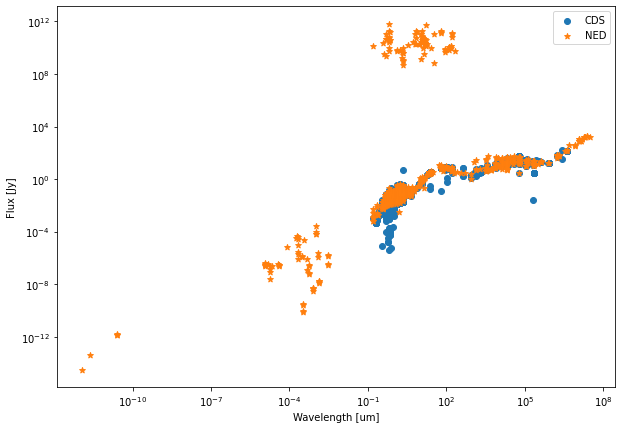

In [22]:
plotSED(221)

### Notebook Info:

In [17]:
%load_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.2.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.13.0-39-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.0

astropy   : 5.0
numpy     : 1.20.3
matplotlib: 3.5.0

Watermark: 2.3.0

